# Check results from two different runs

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

In [2]:
analyzer_new = LatticeData(datadir = "/data_nls_new/")
analyzer_old = LatticeData(datadir = "/data_nls/")

In [3]:
src_dir_new = "/run_7_14_23_new/"
analyzer_new.collect_data(src_dir_new)
src_dir_old = "/run_7_14_23_old/"
analyzer_old.collect_data(src_dir_old)

run L_40_beta_1.600000_itheta_0.785398_ntherm_1000_nMC_10000_freq_100 not yet complete: 92 lines
run L_40_beta_1.600000_itheta_1.570796_ntherm_1000_nMC_10000_freq_100 not yet complete: 1 lines


In [4]:
v1 = LatticeData(datadir = "/data_nls/")
v2 = LatticeData(datadir = "/data_nls_new/")

In [5]:
df_old = v1.do_stats(therm = 0.0)
len_mask = df_old.index.get_level_values('length') < 20 
nMC_mask = df_old.index.get_level_values('nMC') == 10000
ntherm_mask = df_old.index.get_level_values('ntherm') == 0
#df_old = df_old[len_mask & nMC_mask & nMC_mask]
#df_old = df_old.dropna()
df_new = v2.do_stats(therm = 0.0)

In [6]:
df_old.columns = pd.MultiIndex.from_product([df_old.columns, ['v1']])
df_new.columns = pd.MultiIndex.from_product([df_new.columns, ['v2']])

In [7]:
df_all = pd.concat([df_old,df_new])
df_all = df_all.stack()
df_all.index.set_names('version', level=len(df_all.index.names)-1, inplace=True)

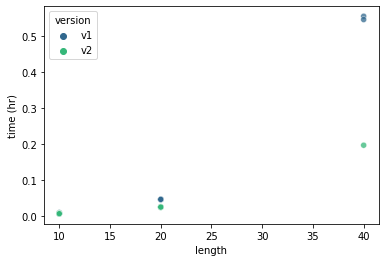

In [8]:
sns.scatterplot(data = df_all, x = "length", y = "time (hr)", hue = "version", 
                alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

# Check Observables

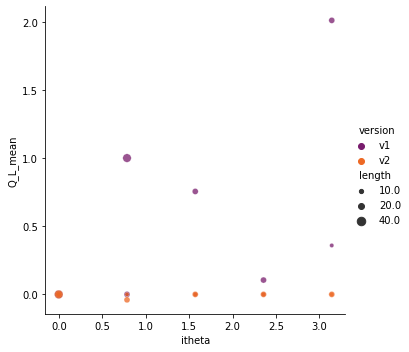

In [9]:
sns.relplot(data = df_all, x = "itheta", y = "Q_L_mean", hue = "version", 
                size = "length", alpha = 0.75, palette = "inferno")
#plt.yscale('log')
plt.show()

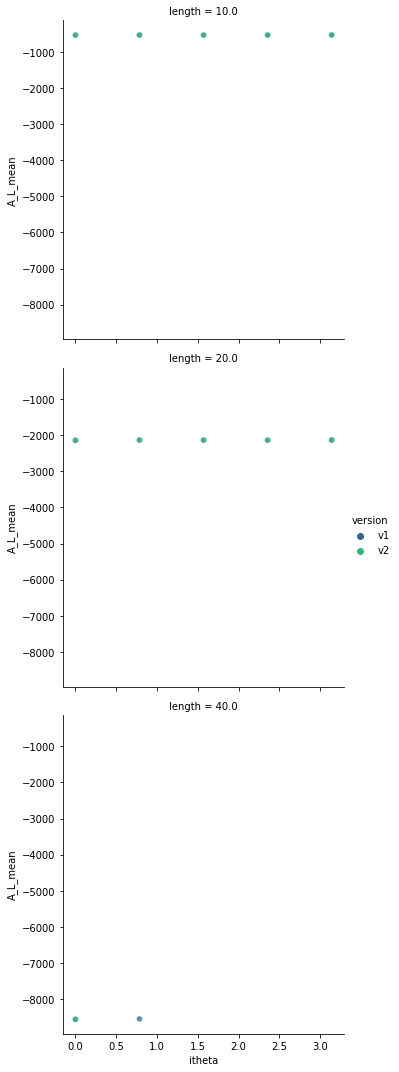

In [10]:
sns.relplot(data = df_all, x = "itheta", y = "A_L_mean", hue = "version", 
                row = "length",alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

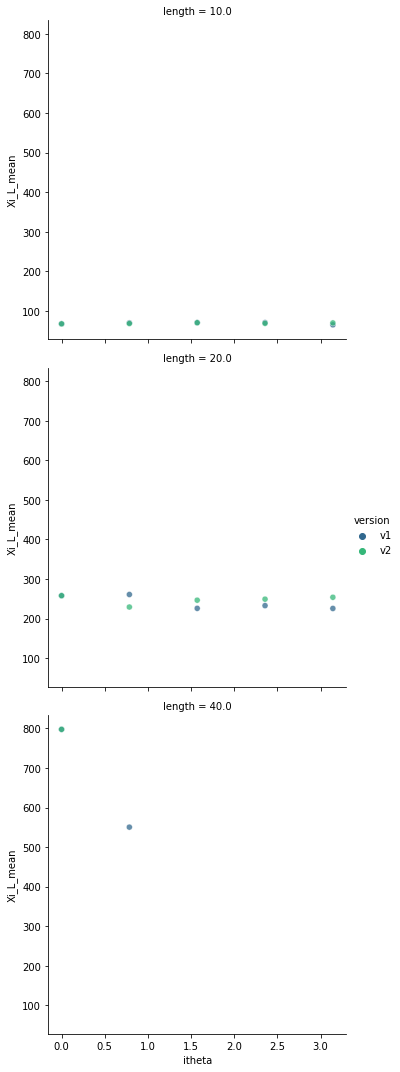

In [11]:
sns.relplot(data = df_all, x = "itheta", y = "Xi_L_mean", hue = "version", 
                row = "length", alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

In [12]:
sns.relplot(data = df_all, x = "itheta", y = "corr_length_mean", hue = "version", 
                row = "length", alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

ValueError: Could not interpret value `corr_length_mean` for parameter `y`